In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('./drive/MyDrive/Colab Notebooks/2sentimentanalysis/dataa.tsv', delimiter='\t', quoting=3)


In [ ]:
dataset.shape

(406, 2)

In [ ]:
dataset.head()

,Review,Liked
0,works perfectly without stickiness,1
1,It's my second sunscreen and i will stick to i...,1
2,It makes my skin glow and lovely,1
3,Its okay but i cant mix it with other product ...,0
4,May favourite,1


In [ ]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')

all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus=[]
for i in range(0, 406):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
corpus

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [ ]:
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [ ]:
# Saving BoW dictionary to later use in prediction
import pickle
bow_path = './drive/MyDrive/Colab Notebooks/2sentimentanalysis/3.1 BoW_Sentiment Model.pk1'
pickle.dump(cv, open(bow_path, "wb"))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(classifier,'./drive/MyDrive/Colab Notebooks/2sentimentanalysis/3.2 classifiersentiment Model' )

['./drive/MyDrive/Colab Notebooks/2sentimentanalysis/3.2 classifiersentiment Model']

In [ ]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[21  0]
 [ 9 52]]


0.8902439024390244

In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)


F1 Score: 0.9203539823008848


In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 1.0
Recall: 0.8524590163934426


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


Precision: 1.0
Recall: 0.8524590163934426
F1 Score: 0.9203539823008848
Accuracy: 0.8902439024390244


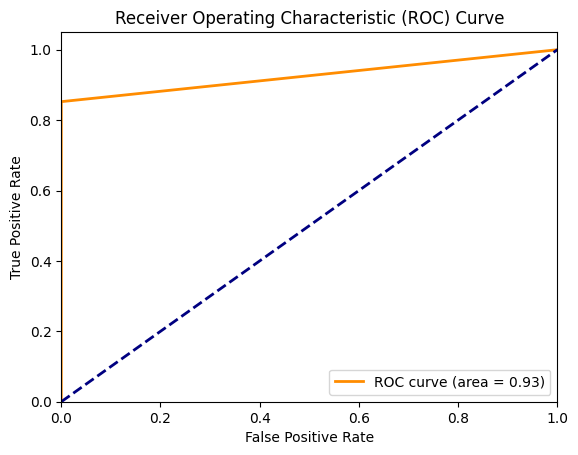

In [ ]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('./drive/MyDrive/Colab Notebooks/2sentimentanalysis/test.tsv', delimiter='\t', quoting=3)


In [ ]:
dataset.head()

,Review
0,leaves an oily look
1,this is one of the only sunscreen creams that ...
2,This one works really great on sunlight!! Must...
3,Good product
4,I have been purchasing Nivea products more and...


In [ ]:
dataset.shape

(19, 1)

In [ ]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus=[]

for i in range(0, 19):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
# Loading BoW dictionary
from sklearn.feature_extraction.text import CountVectorizer
import pickle
cvFile= './drive/MyDrive/Colab Notebooks/2sentimentanalysis/3.1 BoW_Sentiment Model.pk1'
#cv = CountVectorizer(decode_error="replace", vocabulary=pickle.load(open('./drive/MyDrive/Colab Notebooks/2sentimentanalysis/3.1 BoW_Sentiment Model.pk1', "rb")))
cv = pickle.load(open(cvFile, "rb"))


In [ ]:
X_fresh = cv.transform(corpus).toarray()
X_fresh.shape

(19, 275)

In [ ]:
import joblib
classifier = joblib.load('./drive/MyDrive/Colab Notebooks/2sentimentanalysis/3.2 classifiersentiment Model' )

In [ ]:
y_pred = classifier.predict(X_fresh)
print(y_pred)

[0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1]


In [ ]:
dataset['predicted_label'] = y_pred.tolist()
dataset.head()

,Review,predicted_label
0,leaves an oily look,0
1,this is one of the only sunscreen creams that ...,1
2,This one works really great on sunlight!! Must...,1
3,Good product,0
4,I have been purchasing Nivea products more and...,1


In [ ]:
dataset.to_csv("./drive/MyDrive/Colab Notebooks/2sentimentanalysis/3.3 predicted test.tsv", sep='\t', encoding='UTF-8', index=False)